In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
        levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

Пункт 4

In [ ]:
X, y = make_moons(n_samples = 1000, shuffle = 1, noise = 0.25, random_state = 77)
print("Координаты точек: ") 
print(X[:15])
print("Метки класса: ") 
print(y[:15])

Координаты точек: 
[[ 0.3877582   0.83132146]
 [ 0.75917445  0.37546408]
 [ 0.16596943  1.06109846]
 [ 2.23428045  0.2359786 ]
 [-0.89666798  1.0952051 ]
 [ 0.94876632  0.31861216]
 [-0.81661113  0.04043469]
 [ 0.02592078  0.16408361]
 [-0.92023208  0.20859127]
 [ 0.27797801  0.63569972]
 [ 0.83512001  0.62834727]
 [ 0.0828706  -0.14748687]
 [ 0.15418065  0.92032556]
 [-0.39249897  1.18232379]
 [ 1.19731795 -0.30376657]]
Метки класса: 
[0 0 0 1 0 0 0 1 0 0 0 1 0 0 1]


Пункт 5

<function matplotlib.pyplot.show(*args, **kw)>

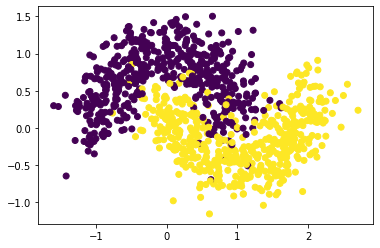

In [ ]:
plt.scatter (X[:,0], X[:,1], c=y)
plt.show

Пункт 6

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1,  )

Пункт 7

<function matplotlib.pyplot.show(*args, **kw)>

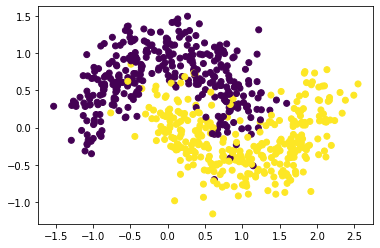

In [77]:
plt.scatter (X_train[:,0], X_train[:,1], c=y_train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

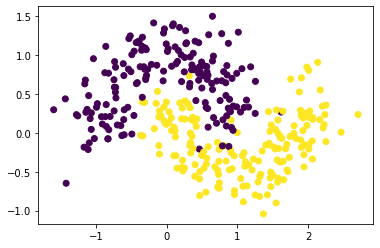

In [78]:
plt.scatter (X_test[:,0], X_test[:,1], c=y_test)
plt.show

Пункт 8

In [79]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

In [80]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [81]:
prediction = knn.predict(X_test)

In [82]:
print('Prediction and test: ')
print(prediction)
print(y_test)

Prediction and test: 
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0
 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0

In [83]:
print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

Confusion matrix: 
[[161  12]
 [  8 169]]


In [84]:
print('Accuracy score: ', accuracy_score(prediction, y_test))

Accuracy score:  0.9428571428571428


In [85]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       173
           1       0.93      0.95      0.94       177

    accuracy                           0.94       350
   macro avg       0.94      0.94      0.94       350
weighted avg       0.94      0.94      0.94       350



Значение площади под кривой ошибок (AUC ROC)

In [86]:
roc_auc_score(y_test, prediction)

0.9427190490186473

Область принятия решений по каждому классу

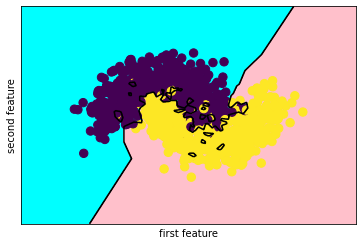

In [87]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**n_neighbors = 3** - Метод к-ближайших соседей

In [89]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))
print('AUC ROC: ', roc_auc_score(y_test, prediction))

Prediction and test: 
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0

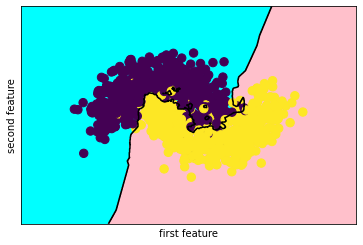

In [90]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**n_neighbors = 5** - Метод к-ближайших соседей

In [91]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))
print('AUC ROC: ', roc_auc_score(y_test, prediction))

Prediction and test: 
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0

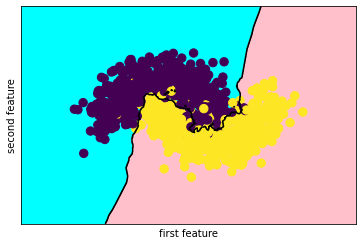

In [92]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**n_neighbors = 9** - Метод к-ближайших соседей


In [93]:
knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))
print('AUC ROC: ', roc_auc_score(y_test, prediction))

Prediction and test: 
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0

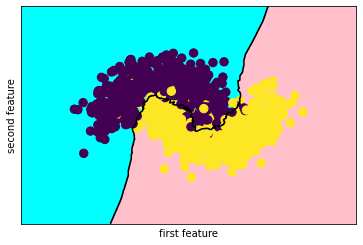

In [94]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**b) Наивный байесовский метод**

In [95]:
knn = GaussianNB()
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))
print('AUC ROC: ', roc_auc_score(y_test, prediction))

Prediction and test: 
[1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0

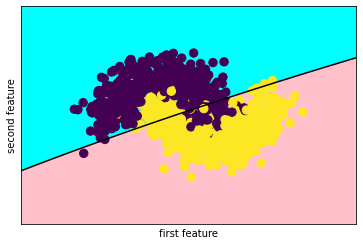

In [96]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**n_estimators = 5** - Случайный лес

In [97]:
knn = RandomForestClassifier(n_estimators = 5)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))
print('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))
print('AUC ROC: ', roc_auc_score(y_test, prediction))

Prediction and test: 
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0

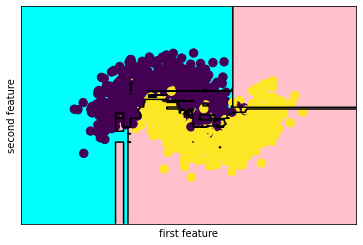

In [98]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**n_estimators = 10** - Случайный лес

In [99]:
knn = RandomForestClassifier(n_estimators = 10)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))
print('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))
print('AUC ROC: ', roc_auc_score(y_test, prediction))

Prediction and test: 
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0
 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0

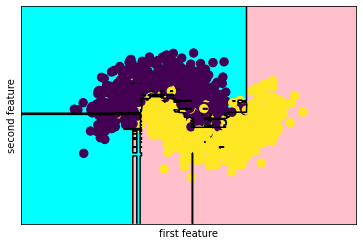

In [100]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**n_estimators = 15** - Случайный лес

In [101]:
knn = RandomForestClassifier(n_estimators = 15)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))
print('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))
print('AUC ROC: ', roc_auc_score(y_test, prediction))

Prediction and test: 
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0

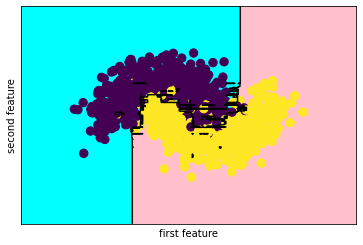

In [102]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**n_estimators = 20** - Случайный лес

In [103]:
knn = RandomForestClassifier(n_estimators = 20)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))
print('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))
print('AUC ROC: ', roc_auc_score(y_test, prediction))

Prediction and test: 
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0

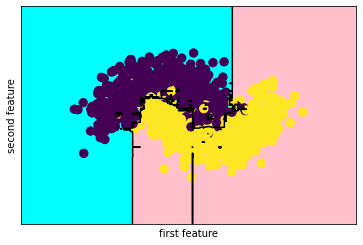

In [104]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**n_estimators = 50** - Случайный лес

In [105]:
knn = RandomForestClassifier(n_estimators = 50)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))
print('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))
print('AUC ROC: ', roc_auc_score(y_test, prediction))

Prediction and test: 
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0

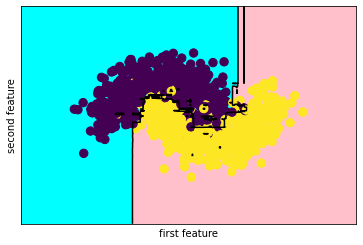

In [106]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)